In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline

In [2]:
#G = nx.read_adjlist('grid/adj')
#F = nx.read_adjlist('wiki/adj')

edge_list = []
with open("wiki/adj", mode='r') as fopen:
    for line in fopen:
        if not line.startswith('%'):
            user = line.split()[0] # 1st column is the user id
            article = line.split()[1] # 2nd column is the article id
            edge_list.append(('u'+user, 'a' + article))
           
       

F = nx.Graph()
F.add_edges_from(edge_list)

G = nx.read_edgelist('grid/adj', comments = '%', nodetype=int)

# EX 3

## 3.1

N, E, density and the average degree for the us power grid:

In [3]:
N_G = G.number_of_nodes()
E_G = G.number_of_edges()
density_G = nx.density(G)

degrees = [val for (node, val) in G.degree()] 
avg_deg = np.mean(degrees)

print(N_G, E_G, density_G, avg_deg)

4941 6594 0.0005403026973346214 2.66909532483303


N, E, density and the average degree for the us de wiki:

In [4]:
N_F = F.number_of_nodes()
E_F = E = F.number_of_edges()
density_F = nx.density(F)

degrees = [val for (node, val) in F.degree()] 
avg_deg = np.mean(degrees)

print(N_F, E_F, density_F, avg_deg)

75507 167880 5.889253883595384e-05 4.4467400373475305


## 3.2

In [5]:
cc = nx.connected_components(G)

l = [len(c) for c in sorted(cc, key=len, reverse=True)]
l

[4941]

In [6]:
cc = nx.connected_components(F)

l = [len(c) for c in sorted(cc, key=len, reverse=True)]

l[0:2]


[74044, 13]

Network G (power grid) has only a single connected component of size 4941. Network F (wiki) has two connected components, one of size 74044 and the second largest is of size 13. 

## 3.3

In [7]:
nx.diameter(G)

46

In [8]:
nx.average_shortest_path_length(G)

18.989185424445708

## 3.4

In [9]:
import random
random.seed(0)

First we compute the average length of a path for F. Note that we dont use random.sample as its becoming deprecated.

In [12]:

largest_cc = list(max(nx.connected_components(F), key=len))
l = 0
n = len(largest_cc)
for i in range(1000):
    u = largest_cc[random.randint(0,n)]
    v = u
    while v == u:
        v = largest_cc[random.randint(0,n)]
    #print(u, v)
    l += nx.shortest_path_length(F, source=u, target=v)
        
l /= 1000

print(l)

4.179


We then compute the same for G. Notice how the error is very small when compared to the value computed for the entire graph.

In [13]:
largest_cc = list(max(nx.connected_components(G), key=len))
l = 0
n = len(largest_cc)
for i in range(1000):
    u = largest_cc[random.randint(0,n)]
    v = u
    while v == u:
        v = largest_cc[random.randint(0,n)]
    #print(u, v)
    l += nx.shortest_path_length(G, source=u, target=v)
        
l /= 1000

print(l)

19.001


## 3.5

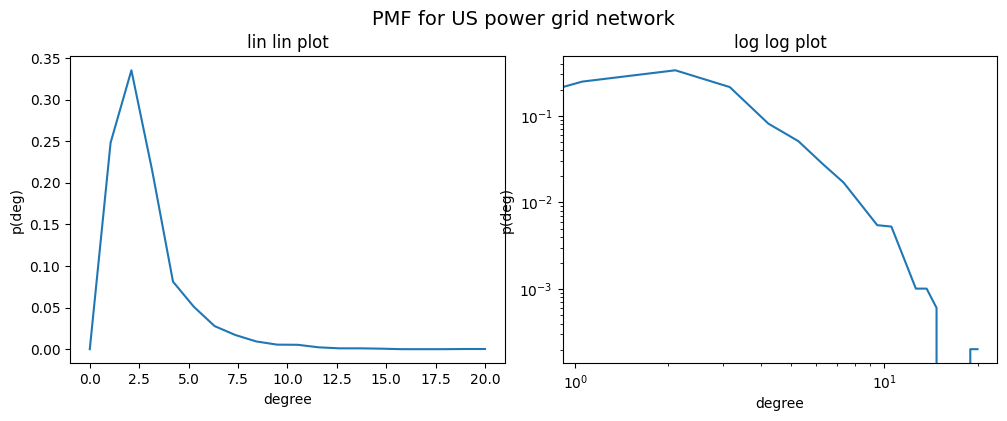

In [14]:
seq_abs = sorted((d for n, d in G.degree()), reverse=True)
seq = np.array(seq_abs)

pmf_y = np.bincount(seq)
total = np.sum(pmf_y)
pmf_y = pmf_y / total
pmf_x = np.linspace(0, len(pmf_y), num=len(pmf_y))


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("PMF for US power grid network", fontsize=14)
fig.tight_layout() 
ax1.set_xlabel('degree')
ax2.set_xlabel('degree')
ax1.set_ylabel('p(deg)')
ax2.set_ylabel('p(deg)')

ax1.plot(pmf_x, pmf_y)
ax1.set_title("lin lin plot")

ax2.plot(pmf_x, pmf_y)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("log log plot")

plt.show()

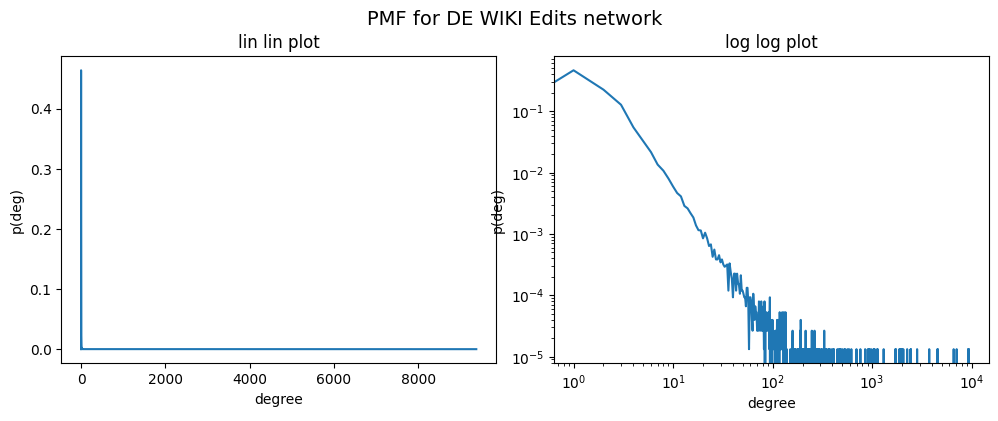

In [15]:
seq_abs = sorted((d for n, d in F.degree()), reverse=True)
seq = np.array(seq_abs)

pmf_y = np.bincount(seq)
total = np.sum(pmf_y)
pmf_y = pmf_y / total
pmf_x = np.linspace(0, len(pmf_y), num=len(pmf_y))


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("PMF for DE WIKI Edits network", fontsize=14)
fig.tight_layout() 
ax1.set_xlabel('degree')
ax2.set_xlabel('degree')
ax1.set_ylabel('p(deg)')
ax2.set_ylabel('p(deg)')

ax1.plot(pmf_x, pmf_y)
ax1.set_title("lin lin plot")

ax2.plot(pmf_x, pmf_y)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("log log plot")

plt.show()

## 3.6

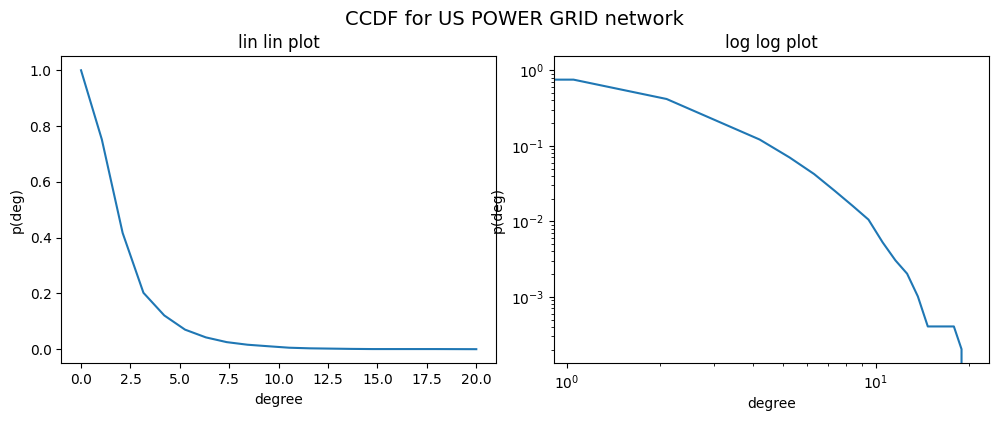

In [16]:
# Note: I think the probabilities are wrong in the example plots from the task

seq_abs = sorted((d for n, d in G.degree()), reverse=True)
seq = np.array(seq_abs)

pmf_y = np.bincount(seq)
total = np.sum(pmf_y)
pmf_y = pmf_y / total
ccdf_y = 1 - np.add.accumulate(pmf_y)
ccdf_x = np.linspace(0, len(pmf_y), num=len(pmf_y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("CCDF for US POWER GRID network", fontsize=14)
fig.tight_layout() 
ax1.set_xlabel('degree')
ax2.set_xlabel('degree')
ax1.set_ylabel('p(deg)')
ax2.set_ylabel('p(deg)')

ax1.plot(ccdf_x, ccdf_y)
ax1.set_title("lin lin plot")

ax2.plot(ccdf_x, ccdf_y)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("log log plot")

plt.show()

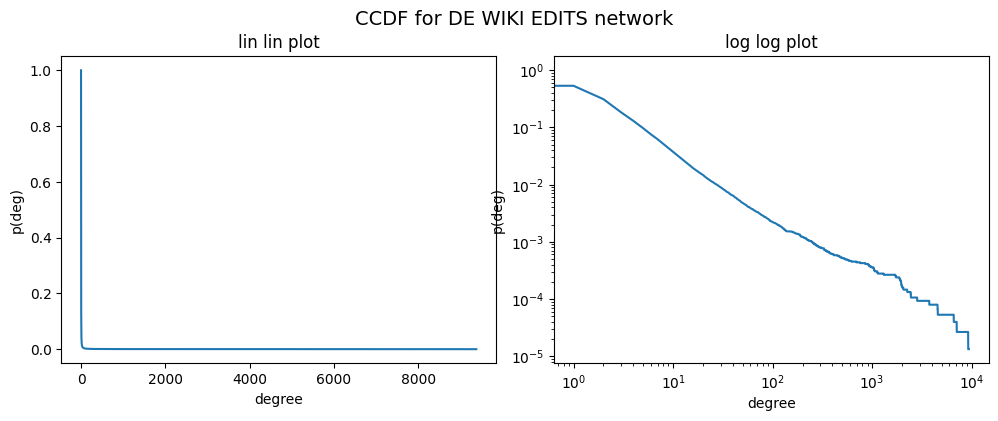

In [17]:
seq_abs = sorted((d for n, d in F.degree()), reverse=True)
seq = np.array(seq_abs)

pmf_y = np.bincount(seq)
total = np.sum(pmf_y)
pmf_y = pmf_y / total
ccdf_y = 1 - np.add.accumulate(pmf_y)
ccdf_x = np.linspace(0, len(pmf_y)-1, num=len(pmf_y)-1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("CCDF for DE WIKI EDITS network", fontsize=14)
fig.tight_layout() 
ax1.set_xlabel('degree')
ax2.set_xlabel('degree')
ax1.set_ylabel('p(deg)')
ax2.set_ylabel('p(deg)')

ax1.plot(ccdf_x, ccdf_y[0:-1])
ax1.set_title("lin lin plot")

ax2.plot(ccdf_x, ccdf_y[0:-1])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title("log log plot")

plt.show()

## 3.7 & 3.8

Calculating best minimal value for power law fit
alpha:  1.4958965970313298
xmin:  0.005262092693786683


Values less than or equal to 0 in data. Throwing out 0 or negative values


<AxesSubplot: >

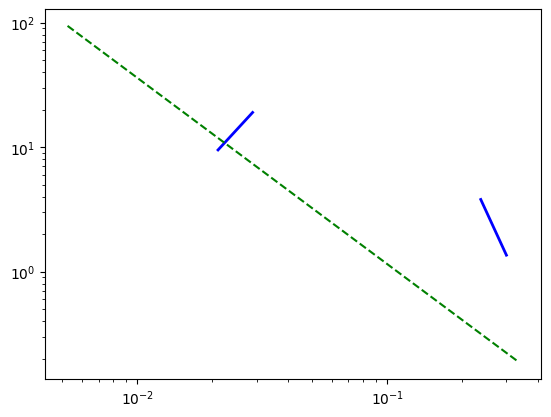

In [18]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α

seq_abs = sorted((d for n, d in G.degree()), reverse=True)
seq = np.array(seq_abs)

pmf_y = np.bincount(seq) / N_G

fit = powerlaw.Fit(pmf_y) 

print("alpha: ",fit.power_law.alpha)
print("xmin: ", fit.power_law.xmin)

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

Calculating best minimal value for power law fit
alpha:  1.4778861070151033
xmin:  3.973141563033891e-05


Values less than or equal to 0 in data. Throwing out 0 or negative values


<AxesSubplot: >

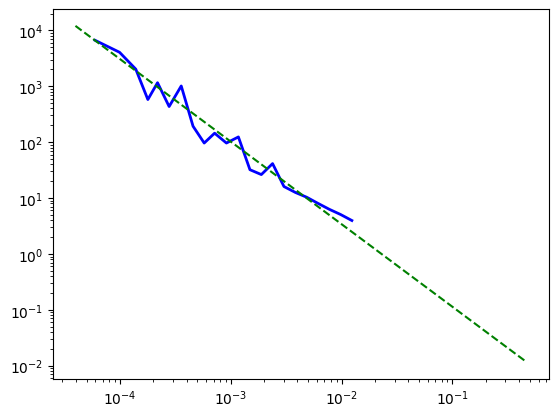

In [19]:
seq_abs = sorted((d for n, d in F.degree()), reverse=True)
seq = np.array(seq_abs)

pmf_y = np.bincount(seq) / N_F

fit = powerlaw.Fit(pmf_y) 


print("alpha: ",fit.power_law.alpha)
print("xmin: ", fit.power_law.xmin)

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

Based on the two comparision plots we can clearly see thath the DE wiki networks fits a power law, meanwhile the US power grid network doesnt. Therefore we conclude that the wiki edits networks is scale free. 

Using the powerlaw package we were able to estimate the exponent to be around ~1.5.


## 3.9

For both networks I estimate the 90% mark at a degree of about one.